In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/noshowappointments/KaggleV2-May-2016.csv')
df.head(7)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes


In [3]:
df.shape

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df['PatientId'].nunique()

62299

In [7]:
df['PatientId'].duplicated().sum()

48228

In [8]:
df.duplicated(['PatientId','No-show']).sum()

38710

In [9]:
mask=df.query('Age== "-1"')

In [10]:
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [11]:
df.drop(index= 99832 , inplace= True)

In [12]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
df.drop_duplicates(['PatientId','No-show'],inplace=True)

In [14]:
df.shape

(71816, 14)

In [15]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis =1, inplace=True)
df

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110518,F,50,MARIA ORTIZ,0,0,0,0,0,1,No
110520,F,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,F,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No


In [16]:
#Exploratory Data Analysis

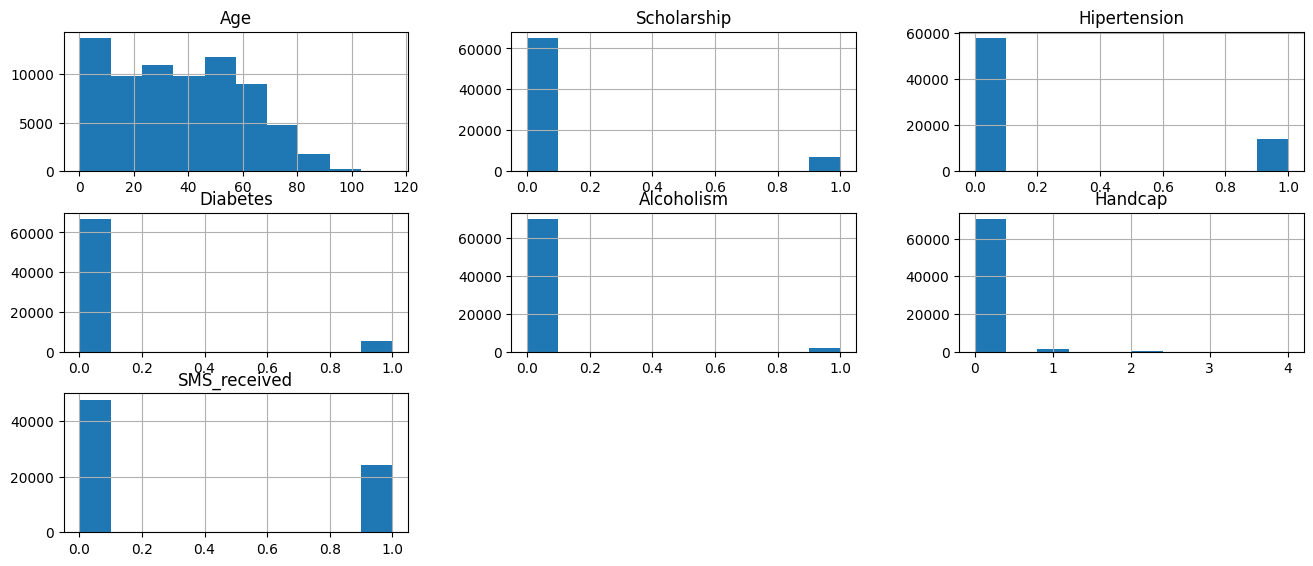

In [17]:
df.hist(figsize=(16,6.5))
plt.show()

In [18]:
df['No-show'].value_counts()

No-show
No     54153
Yes    17663
Name: count, dtype: int64

In [19]:
show= df['No-show']=='No'
noshow = df['No-show']=='Yes'
df[show].count(),df[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hipertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No-show          54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hipertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No-show          17663
 dtype: int64)

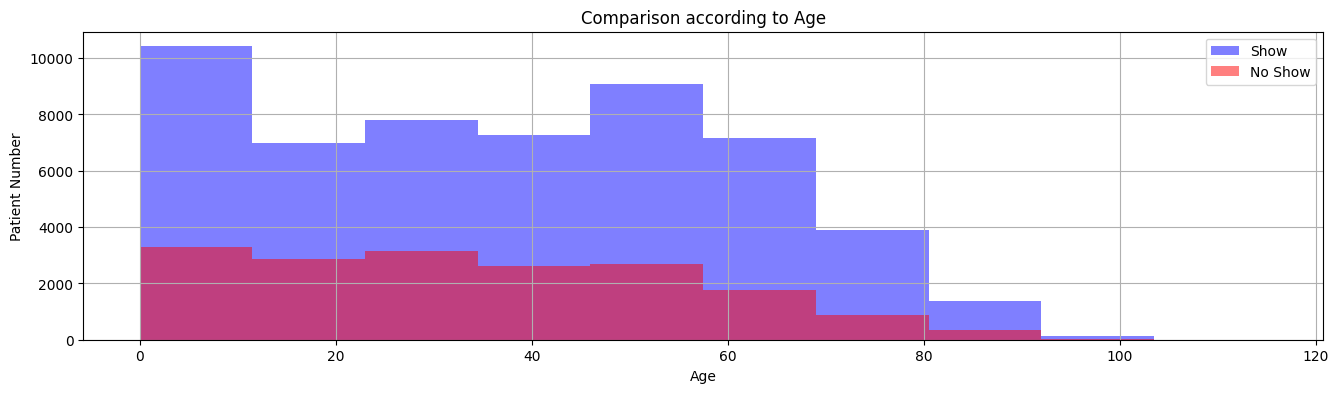

In [20]:
def attendance(df, columnname, attend, absent):
    plt.figure(figsize=(16, 4))
    df[df['No-show'] == attend][columnname].hist(alpha=0.5, bins=10, color='blue', label='Show')
    df[df['No-show'] == absent][columnname].hist(alpha=0.5, bins=10, color='red', label='No Show')
    plt.legend()
    plt.title('Comparison according to ' + columnname)
    plt.xlabel(columnname)
    plt.ylabel('Patient Number')

attendance(df, 'Age', 'No', 'Yes')

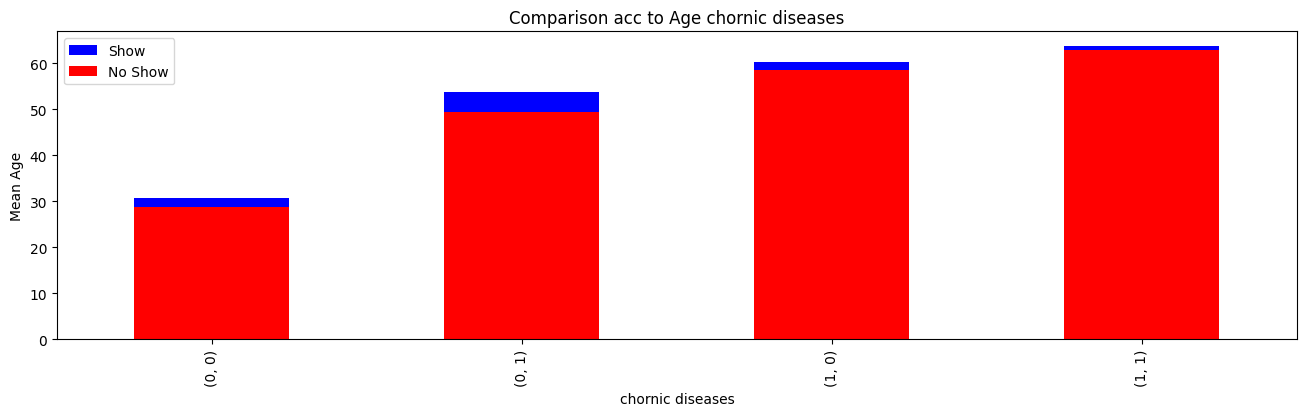

In [21]:
# does age and chornic diseases affect the attendence together
plt.figure(figsize=(16,4))
df[df['No-show'] == 'No'].groupby(['Hipertension','Diabetes'])['Age'].mean().plot(kind='bar',color = 'blue',label = 'Show')
df[df['No-show'] == 'Yes'].groupby(['Hipertension','Diabetes'])['Age'].mean().plot(kind='bar',color = 'red',label = 'No Show')
plt.legend()
plt.title('Comparison acc to Age chornic diseases')
plt.xlabel('chornic diseases')
plt.ylabel('Mean Age')
plt.show()

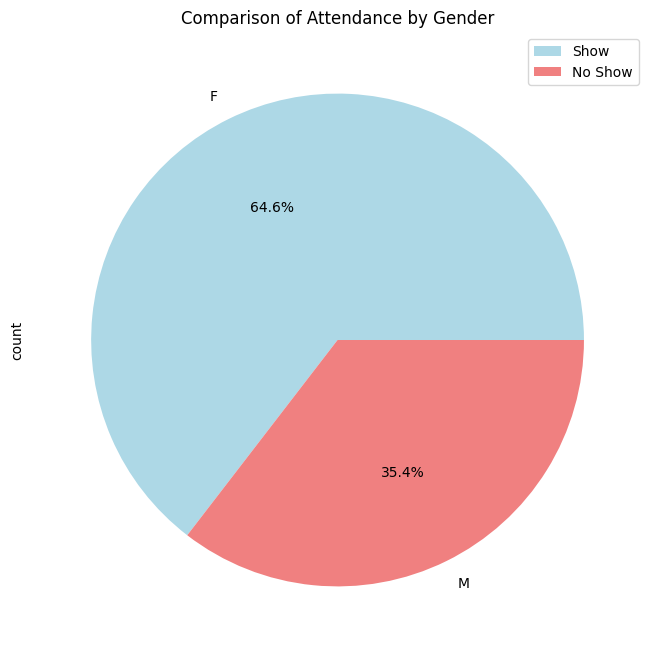

In [22]:
# does gender effect to attendence
def attendance(df, columnname, attend, absent):
    plt.figure(figsize=(16, 8))
    df[df['No-show'] == attend][columnname].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
    plt.title('Comparison of Attendance by Gender')
    plt.legend(labels=['Show', 'No Show'], loc='upper right')

attendance(df, 'Gender', 'No', 'Yes')
plt.show()

In [23]:
# gender has no clear affect on attendence

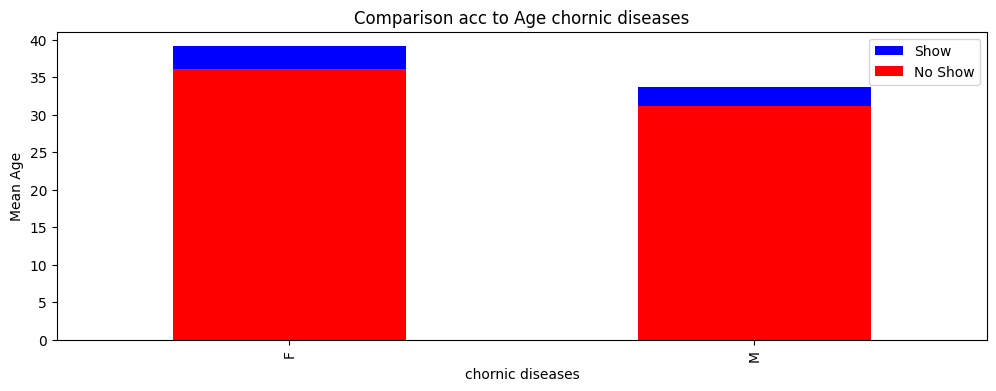

In [24]:
# does age and chornic diseases affect the attendence together by gender mean age
plt.figure(figsize=(12,4))
df[df['No-show'] == 'No'].groupby('Gender')['Age'].mean().plot(kind='bar',color = 'blue',label = 'Show')
df[df['No-show'] == 'Yes'].groupby('Gender')['Age'].mean().plot(kind='bar',color = 'red',label = 'No Show')
plt.legend()
plt.title('Comparison acc to Age chornic diseases')
plt.xlabel('chornic diseases')
plt.ylabel('Mean Age')
plt.show()


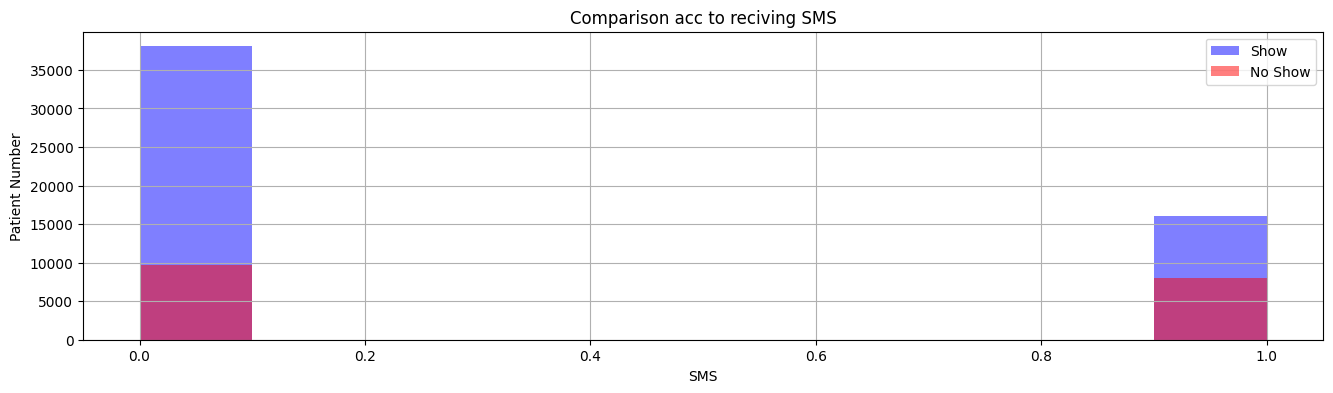

In [25]:
# Question does Receiving SMS affect the attendence
def attendance(df, columnname, attend, absent):
    plt.figure(figsize=(16, 4))
    df[df['No-show'] == attend][columnname].hist(alpha=0.5, bins=10, color='blue', label='Show')
    df[df['No-show'] == absent][columnname].hist(alpha=0.5, bins=10, color='red', label='No Show')
    plt.legend()
    plt.title('Comparison acc to reciving SMS')
    plt.xlabel('SMS')
    plt.ylabel('Patient Number')

attendance(df, 'SMS_received', 'No', 'Yes')


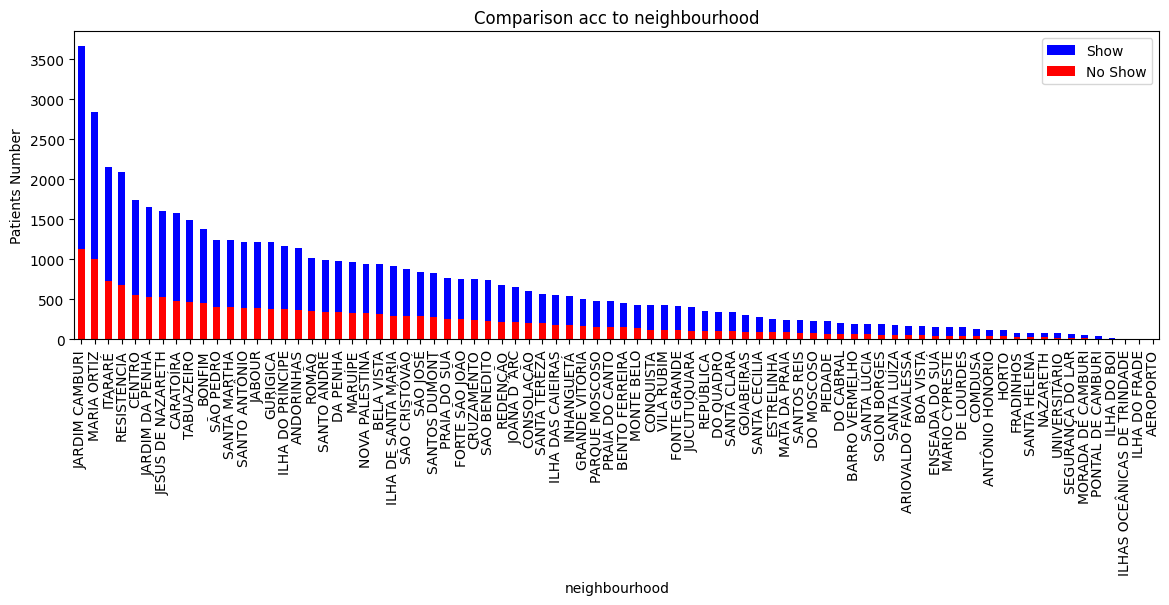

In [26]:
# does neighbourhood affect to attendence or not 
plt.figure(figsize=(14,4))
df['Neighbourhood'][df['No-show'] == 'No'].value_counts().plot(kind='bar',color = 'blue',label = 'Show')
df['Neighbourhood'][df['No-show'] == 'Yes'].value_counts().plot(kind='bar',color = 'red',label = 'No Show')
plt.legend()
plt.title('Comparison acc to neighbourhood')
plt.xlabel('neighbourhood')
plt.ylabel('Patients Number')
plt.show()


**Conclusions**

Neighbourhood has a greet effect on attendence or not, Jardim and camburi has the greatest number of patient and also the greatest showing rate. number of showing pattients from specific neighbourhood sms and ages. the age from 0 to 8 the most showing and 45 to 55 least attend number of showing patients without receiving sms is greater than showing patients with receiving sms